In [7]:
!pip install transformers torch torchvision openai pillow


In [8]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests


In [9]:
# Load CLIP model from Hugging Face
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")


In [6]:
def classify_image(image_path, food_classes):
    # Open and preprocess the image
    image = Image.open(image_path).convert("RGB")

    # Prepare the inputs (including text) for the CLIP model
    inputs = clip_processor(images=image, text=food_classes, return_tensors="pt", padding=True, truncation=True)

    # Get image features from CLIP model
    outputs = clip_model(**inputs)

    # Calculate probabilities
    probs = torch.softmax(outputs.logits_per_image, dim=1)

    # Get the predicted food category
    predicted_category = food_classes[torch.argmax(probs).item()]

    return predicted_category


In [5]:
from google.colab import files

# Upload an image
uploaded = files.upload()

# Get the file path of the uploaded image
image_path = list(uploaded.keys())[0]

# Display the image path
print(f"Uploaded image path: {image_path}")


Saving pizza.jpeg to pizza (1).jpeg
Uploaded image path: pizza (1).jpeg


In [4]:
import torch
from PIL import Image
from transformers import CLIPProcessor, CLIPModel

# Load CLIP model
model_name = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_name)
processor = CLIPProcessor.from_pretrained(model_name)

def classify_food(image_path):
    image = Image.open(image_path)

    # Define possible food categories
    food_classes = [
        "Biryani", "Butter Chicken", "Paneer Tikka", "Dal Makhani", "Chole Bhature", "Dosa",
        "Idli", "Vada Pav", "Pav Bhaji", "Samosa", "Pani Puri", "Tandoori Chicken", "Aloo Paratha",
        "Rogan Josh", "Malai Kofta", "Korma", "Momos", "Hyderabadi Biryani",
        "Pizza", "Pasta", "Lasagna", "Ravioli", "Risotto", "Bruschetta", "Gnocchi",
        "Carbonara", "Tiramisu", "Burger", "Hot Dog", "Fried Chicken", "Grilled Cheese",
        "BBQ Ribs", "Buffalo Wings", "Mac and Cheese", "Pancakes", "Waffles", "Brownie",
        "Cheesecake", "Tacos", "Burrito", "Quesadilla", "Nachos", "Churros", "Guacamole",
        "Fajitas", "Fried Rice", "Chow Mein", "Spring Rolls", "Dumplings", "Sweet and Sour Chicken",
        "Peking Duck", "Mapo Tofu", "Hot and Sour Soup", "Gyoza", "Sushi", "Ramen", "Tempura",
        "Udon", "Miso Soup", "Takoyaki", "Onigiri", "Hummus", "Falafel", "Shawarma", "Kebab",
        "Baba Ganoush", "Tabbouleh", "Croissant", "Baguette", "Quiche", "Ratatouille",
        "Crème Brûlée", "French Toast", "Curry", "Steak", "Sandwich", "Soup", "Noodles",
        "Ice Cream", "Fries", "Donuts", "Salad", "Pudding", "Gulab Jamun", "Halwa", "Tandoori Roti",
        "Kimchi", "Kimchi Fried Rice", "Ceviche", "Paella", "Pho", "Empanadas", "Bibimbap",
        "Shakshuka", "Schnitzel"
    ]

    # Process the inputs for CLIP (both text and image)
    inputs = processor(text=food_classes, images=image, return_tensors="pt", padding=True, truncation=True)

    # Forward pass through the model
    outputs = model(**inputs)

    # Get the probabilities for each class
    probs = outputs.logits_per_image.softmax(dim=1)

    # Find the most likely class
    predicted_class = food_classes[probs.argmax().item()]

    return predicted_class


In [2]:
from transformers import pipeline

# Load GPT-2 model for text generation
generator = pipeline("text-generation", model="gpt2")


def generate_recipe(food_name):
    # Define the structured prompt for recipe generation
    prompt = f"""
        Generate a well-structured, detailed, and step-by-step recipe for {food_name}.
    """

    # Generate Recipe using GPT-2
    recipe = generator(
        prompt,
        max_length=180,  # Reduced max length to avoid excessive text
        num_return_sequences=1,
        truncation=True,
        pad_token_id=50256
    )

    # Return the generated recipe text
    return recipe[0]["generated_text"]


Device set to use cpu


In [16]:
# Classify the food in the uploaded image
food_name = classify_food(image_path)
print(f"🍽️ Food Identified: {food_name}")

# Generate recipe based on identified food
recipe = generate_recipe(food_name)
print("\n✅ Recipe Generated:\n")
print(recipe)


🍽️ Food Identified: Pizza

✅ Recipe Generated:


        Generate a well-structured, detailed, and step-by-step recipe for Pizza.
        Using pizza dough or other forms of pizza dough to make pies is now easier. The method you selected can now be used. Simply click a button and press the button.
         For the first time in a set time, you can now change the time in question. See what happens when you do.
             Create a "kitchen" for your pie.
                                        
            


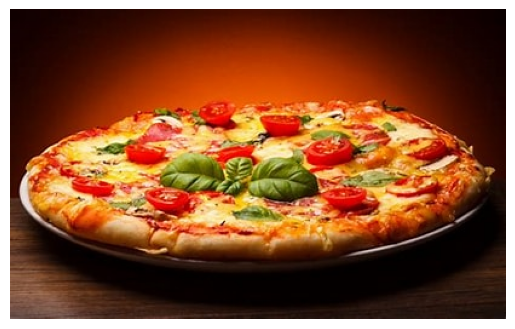


📌 Recipe Generated:


        Generate a well-structured, detailed, and step-by-step recipe for Pizza.
       
It's one of those things where a lot of the people that build this website are not really, truly programmers, but are just not very good at it, and so make it your own. It's a good thing that the people running the site have great work ethic, but the people working on the site never really want to commit to any level of dedication. You can build something amazing that's never going to happen, as long as you do what's going to work. You don't have to be a great programmer to build something amazing that everyone is gonna buy. You don't have to be that good programmer at the same level as everyone else.
  (Well, I think it was an


In [11]:
import matplotlib.pyplot as plt

# Display the uploaded image
img = Image.open(image_path)
plt.imshow(img)
plt.axis("off")
plt.show()

# Print the generated recipe
print("\n📌 Recipe Generated:\n")
print(recipe)

In [21]:
!pip install pyngrok fastapi uvicorn nest-asyncio
!ngrok authtoken 2t5UAnKRc0rerqUXpKZRRb9F17j_6MfXV99onHexVQ6H9ZXdp


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [1]:
!kill -9 $(lsof -t -i:8000)


kill: usage: kill [-s sigspec | -n signum | -sigspec] pid | jobspec ... or kill -l [sigspec]


In [3]:
!ps aux | grep uvicorn


In [3]:
import os
os.system("kill -9 38191")


256

In [4]:
pip install python-multipart


In [5]:
import uvicorn
import nest_asyncio
import torch
import io
from fastapi import FastAPI, File, UploadFile, HTTPException
from fastapi.responses import JSONResponse
from transformers import pipeline, CLIPProcessor, CLIPModel
from PIL import Image

# Initialize FastAPI
app = FastAPI()

# Load CLIP Model for Image Classification
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load GPT-2 Model for Recipe Generation
generator = pipeline("text-generation", model="gpt2")

# Define Food Categories
food_classes = [
    "Biryani", "Butter Chicken", "Paneer Tikka", "Dal Makhani", "Chole Bhature", "Dosa", "Idli", "Vada Pav",
    "Pav Bhaji", "Samosa", "Pani Puri", "Tandoori Chicken", "Aloo Paratha", "Rogan Josh", "Malai Kofta", "Korma",
    "Momos", "Hyderabadi Biryani", "Pizza", "Pasta", "Lasagna", "Ravioli", "Risotto", "Bruschetta", "Gnocchi",
    "Carbonara", "Tiramisu", "Burger", "Hot Dog", "Fried Chicken", "Grilled Cheese", "BBQ Ribs", "Buffalo Wings",
    "Mac and Cheese", "Pancakes", "Waffles", "Brownie", "Cheesecake", "Tacos", "Burrito", "Quesadilla", "Nachos",
    "Churros", "Guacamole", "Fajitas", "Fried Rice", "Chow Mein", "Spring Rolls", "Dumplings", "Sweet and Sour Chicken",
    "Peking Duck", "Mapo Tofu", "Hot and Sour Soup", "Gyoza", "Sushi", "Ramen", "Tempura", "Udon", "Miso Soup",
    "Takoyaki", "Onigiri", "Hummus", "Falafel", "Shawarma", "Kebab", "Baba Ganoush", "Tabbouleh", "Croissant",
    "Baguette", "Quiche", "Ratatouille", "Crème Brûlée", "French Toast", "Curry", "Steak", "Sandwich", "Soup",
    "Noodles", "Ice Cream", "Fries", "Donuts", "Salad", "Pudding", "Gulab Jamun", "Halwa", "Tandoori Roti",
    "Kimchi", "Kimchi Fried Rice", "Ceviche", "Paella", "Pho", "Empanadas", "Bibimbap", "Shakshuka", "Schnitzel"
]

@app.get("/")
def read_root():
    return {"message": "FastAPI is running successfully!"}

@app.post("/predict")
async def predict(file: UploadFile = File(...)):
    """Predicts the food category from an image and generates a recipe using GPT-2."""

    try:
        # Read Image File
        image = Image.open(io.BytesIO(await file.read()))

        # Process Image using CLIP
        inputs = clip_processor(
            images=image,
            text=food_classes,
            return_tensors="pt",
            padding=True,
            truncation=True
        )
        outputs = clip_model(**inputs)

        # Determine the most probable food category
        probs = torch.softmax(outputs.logits_per_image, dim=1)
        predicted_food = food_classes[torch.argmax(probs).item()]

        # Generate Recipe Prompt
        prompt = f"""
        Provide a well structured, detailed and step-by-step recipe for {predicted_food} .


        """

        # Generate Recipe using GPT-2
        recipe = generator(
            prompt,
            max_length=300,  # Reduced max length to avoid excessive text
            num_return_sequences=1,
            truncation=True,
            pad_token_id=50256
        )

        return JSONResponse({
            "food_category": predicted_food,
            "recipe": recipe[0]["generated_text"]
        })

    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))

# Apply nest_asyncio to avoid runtime issues
nest_asyncio.apply()

# Run FastAPI in a separate thread
import threading
threading.Thread(target=uvicorn.run, args=(app,), kwargs={"host": "0.0.0.0", "port": 8000, "log_level": "info"}).start()


Device set to use cpu


In [6]:
!curl -X GET http://0.0.0.0:8000/


INFO:     127.0.0.1:60162 - "GET / HTTP/1.1" 200 OK
{"message":"FastAPI is running successfully!"}

In [7]:
!pkill -f ngrok

In [8]:
!ngrok authtoken 2t5UAnKRc0rerqUXpKZRRb9F17j_6MfXV99onHexVQ6H9ZXdp

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install pyngrok

from pyngrok import ngrok
import time

# Ensure any previous tunnels are closed
ngrok.kill()

# Start a new tunnel
public_url = ngrok.connect(8000)
print("Public URL:", public_url)

# Keep the tunnel running
while True:
    time.sleep(60)


Public URL: NgrokTunnel: "https://a57c-35-197-3-46.ngrok-free.app" -> "http://localhost:8000"
INFO:     52.6.180.21:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     52.6.180.21:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     52.6.180.21:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     52.6.180.21:0 - "POST /predict HTTP/1.1" 200 OK
